<a href="https://colab.research.google.com/github/AlirezaKhodabakhsh/Genetic_EMG/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep network optimization using a Genetic algorithm for recognizing hand gestures from EMG Signal
- **Kasra Sehhat** [[Email](kasra.sehat@sharif.edu)] [[LinkedIn](linkedin.com/in/kasra-sehat)][[GitHub](https://github.com/kasrasehat)]
- **Alireza Khodabakhsh** [[Email](alireza.khodabakhsh@ee.sharif.edu)][[LinkedIn](https://www.linkedin.com/in/alirezakhodabakhsh/)][[GitHub](https://github.com/AlirezaKhodabakhsh)]
- **Arman Aghaee** [[Email](arman.aghaee@ryerson.ca)] [[LinkedIn](https://www.linkedin.com/in/armanaghaee/)][[GitHub](https://github.com/armanaghaee)]

# Libraries

In [1]:
#!pip install keras.optimizers
import keras.optimizers
a = keras.optimizers.adam_v2
import tensorflow
print(tensorflow.__version__)
import csv
import pandas as pd
from keras.utils import np_utils
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import sklearn
import random
import matplotlib.pyplot as plt
import requests
import sys

2.8.2


# Dataset

In [2]:
link = 'https://zenodo.org/record/1320922/files/dualmyo_dataset.pkl?download=1'
file_name = "dualmyo_dataset.pkl"
with open(file_name, "wb") as f:
    print("Downloading %s" % file_name)
    response = requests.get(link, stream=True)
    total_length = response.headers.get('content-length')

    if total_length is None: # no content length header
        f.write(response.content)
    else:
        dl = 0
        total_length = int(total_length)
        for data in response.iter_content(chunk_size=4096):
            dl += len(data)
            f.write(data)
            done = int(50 * dl / total_length)
            sys.stdout.write("\r[%s%s]" % ('=' * done, ' ' * (50-done)) )
            sys.stdout.flush()

[==================================================]

In [3]:
"""
def mode_rows(a):
    a = np.ascontiguousarray(a)
    void_dt = np.dtype((np.void, a.dtype.itemsize * np.prod(a.shape[1:])))
    _,ids, count = np.unique(a.view(void_dt).ravel(), \
                                return_index=1,return_counts=1)
    largest_count_id = ids[count.argmax()]
    most_frequent_row = a[largest_count_id]
    return most_frequent_row

a = pd.read_pickle(r'/content/drive/My Drive/dualmyo_dataset.pkl')
signal_list =a[0]
label_list =a[1]

signal = np.array([0,0,0,0,0,0,0,0])
k = 0
coef = np.ones([400,1])
target = np.array([0])

for s in signal_list :
    signal = np.vstack((signal,abs(s[:,2:10])))
    signal = np.vstack((signal,abs(s[:,12:20])))
    target  = np.vstack((target,label_list[k]*coef))
    target  = np.vstack((target,label_list[k]*coef))
    k = k + 1

print(signal.shape)    
print(target.shape)   

data = np.concatenate((signal,target),axis=1) 

seq_len = 200
stride = 200
dataset=[]

for i in range(0 , len(data)-seq_len , stride):
    sample =  data[i:i+seq_len,:]
    dataset.append(sample)
    
np.random.shuffle(dataset)        
train, test = sklearn.model_selection.train_test_split(dataset , train_size =int( np.round(0.85*len(dataset))) , test_size = int(np.round(0.15*len(dataset))))


x_train = np.zeros([len(train),seq_len,8,1])
y_train = np.zeros([len(train),1])
f=0
for s  in train :
    x_train[f,:,:,:] = s[:,0:8].reshape(-1,8,1)
    y_train[f, 0] = mode_rows(s[seq_len-20:seq_len,8])
    f = f+1

x_tra = (x_train/128).astype('float32')
y_tra = np_utils.to_categorical(y_train) 



x_test = np.zeros([len(test),seq_len,8,1])
y_test = np.zeros([len(test),1])
p=0
for s  in test :
    x_test[p,:,:,:] = s[:,0:8].reshape(-1,8,1)
    y_test[p, 0] = mode_rows(s[seq_len-20:seq_len,8])
    p = p+1

x_tes = (x_test/128).astype('float32')

y_tes = np_utils.to_categorical(y_test) 
"""

"\ndef mode_rows(a):\n    a = np.ascontiguousarray(a)\n    void_dt = np.dtype((np.void, a.dtype.itemsize * np.prod(a.shape[1:])))\n    _,ids, count = np.unique(a.view(void_dt).ravel(),                                 return_index=1,return_counts=1)\n    largest_count_id = ids[count.argmax()]\n    most_frequent_row = a[largest_count_id]\n    return most_frequent_row\n\na = pd.read_pickle(r'/content/drive/My Drive/dualmyo_dataset.pkl')\nsignal_list =a[0]\nlabel_list =a[1]\n\nsignal = np.array([0,0,0,0,0,0,0,0])\nk = 0\ncoef = np.ones([400,1])\ntarget = np.array([0])\n\nfor s in signal_list :\n    signal = np.vstack((signal,abs(s[:,2:10])))\n    signal = np.vstack((signal,abs(s[:,12:20])))\n    target  = np.vstack((target,label_list[k]*coef))\n    target  = np.vstack((target,label_list[k]*coef))\n    k = k + 1\n\nprint(signal.shape)    \nprint(target.shape)   \n\ndata = np.concatenate((signal,target),axis=1) \n\nseq_len = 200\nstride = 200\ndataset=[]\n\nfor i in range(0 , len(data)-seq_l

# Preprocessing

In [4]:
#Data preprocessing with 16 channels and N samples
def mode_rows(a):
    a = np.ascontiguousarray(a)
    void_dt = np.dtype((np.void, a.dtype.itemsize * np.prod(a.shape[1:])))
    _,ids, count = np.unique(a.view(void_dt).ravel(), \
                                return_index=1,return_counts=1)
    largest_count_id = ids[count.argmax()]
    most_frequent_row = a[largest_count_id]
    return most_frequent_row

    
a = pd.read_pickle(r'/content/dualmyo_dataset.pkl')
signal_list =a[0]
label_list =a[1]

signal = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
k = 0
coef = np.ones([400,1])
target = np.array([0])

for s in signal_list :
  signal1 = np.hstack([abs(s[:,2:10]),abs(s[:,12:20])])
  signal = np.vstack((signal,signal1))
  target = np.vstack((target,label_list[k]*coef)) 
  k = k + 1

print(signal.shape)    
print(target.shape)   

data = np.concatenate((signal,target),axis=1) 

seq_len = 200 
stride = 200
dataset=[]

for i in range(0 , len(data)-seq_len , stride):
    sample =  data[i:i+seq_len,:]
    dataset.append(sample)
    
np.random.shuffle(dataset)        
train, test = sklearn.model_selection.train_test_split(dataset , train_size =int( np.round(0.85*len(dataset))) , test_size = int(np.round(0.15*len(dataset))), shuffle = False)


x_train = np.zeros([len(train),seq_len,16,1])
y_train = np.zeros([len(train),1])
f=0
for s  in train :
    x_train[f,:,:,:] = s[:,0:16].reshape(-1,16,1)
    y_train[f, 0] = mode_rows(s[seq_len-20:seq_len,16])
    f = f+1

x_tra = (x_train/128).astype('float32')
y_tra = np_utils.to_categorical(y_train) 



x_test = np.zeros([len(test),seq_len,16,1])
y_test = np.zeros([len(test),1])
p=0
for s  in test :
    x_test[p,:,:,:] = s[:,0:16].reshape(-1,16,1)
    y_test[p, 0] = mode_rows(s[seq_len-20:seq_len,16])
    p = p+1

x_tes = (x_test/128).astype('float32')
y_tes = np_utils.to_categorical(y_test)

(352401, 16)
(352401, 1)


# Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import layers
import keras
from keras.initializers import RandomUniform
import seaborn as sns


myInput = layers.Input(shape=(seq_len,16,1))
conv1 = layers.Conv2D(131, (20,8), activation='relu',kernel_initializer=RandomUniform(), padding='same', strides=1)(myInput)
conv2 = layers.Conv2D(28, (20,8), activation='relu',kernel_initializer=RandomUniform(), padding='same', strides=1)(conv1)
flat = layers.Flatten()(conv2)
dense1 = layers.Dense(111, activation='relu',kernel_initializer=RandomUniform())(flat)
out_layer = layers.Dense(8, activation='softmax',kernel_initializer=RandomUniform())(dense1)

model = Model(myInput, out_layer)

#Compilie
model.compile( optimizer=Adam (lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08 ) , loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#model fit
history = model.fit(x_tra , y_tra, epochs=30 , batch_size=64 ,shuffle=True , validation_split=0.15)
print((history.history.keys()))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 16, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 200, 16, 131)      21091     
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 16, 28)       586908    
                                                                 
 flatten (Flatten)           (None, 89600)             0         
                                                                 
 dense (Dense)               (None, 111)               9945711   
                                                                 
 dense_1 (Dense)             (None, 8)                 896       
                                                                 
Total params: 10,554,606
Trainable params: 10,554,606
Non-tra

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
20/20 [==============================] - 24s 437ms/step - loss: 1.2150 - accuracy: 0.6096 - val_loss: 0.6951 - val_accuracy: 0.7867
Epoch 2/30
20/20 [==============================] - 5s 246ms/step - loss: 0.3933 - accuracy: 0.8830 - val_loss: 0.3055 - val_accuracy: 0.9822
Epoch 3/30
20/20 [==============================] - 5s 248ms/step - loss: 0.1428 - accuracy: 0.9788 - val_loss: 0.1957 - val_accuracy: 0.9689
Epoch 4/30
20/20 [==============================] - 5s 248ms/step - loss: 0.0818 - accuracy: 0.9827 - val_loss: 0.1793 - val_accuracy: 0.9556
Epoch 5/30
20/20 [==============================] - 5s 253ms/step - loss: 0.0714 - accuracy: 0.9859 - val_loss: 0.1372 - val_accuracy: 0.9733
Epoch 6/30
20/20 [==============================] - 5s 251ms/step - loss: 0.0533 - accuracy: 0.9906 - val_loss: 0.1316 - val_accuracy: 0.9778
Epoch 7/30
20/20 [==============================] - 5s 250ms/step - loss: 0.0337 - accuracy: 0.9937 - val_loss: 0.1037 - val_accuracy: 0.9911
Epoch

# Evaluation

9/9 [==============================] - 1s 40ms/step - loss: 0.0375 - accuracy: 0.9886
0.9886363744735718
[[28  0  0  0  0  1  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0 34  0  1]
 [ 0  0  0  0  0  0 34  0]
 [ 0  0  1  0  0  0  0 35]]


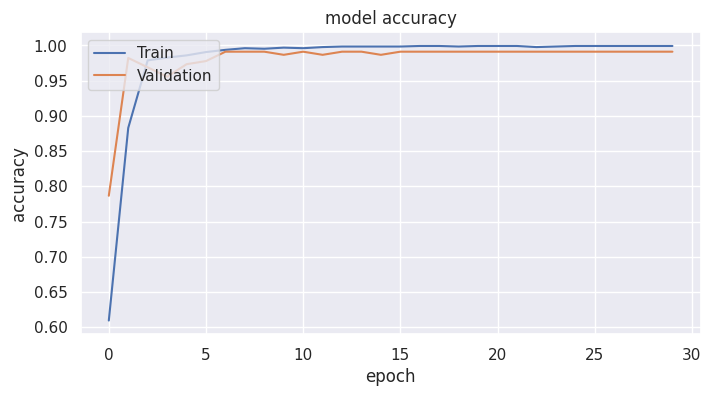

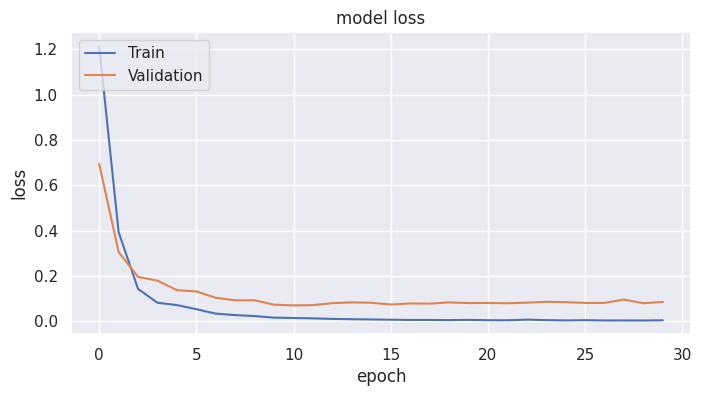

In [6]:
# Evaluation
test_loss, test_acc = model.evaluate(x_tes, y_tes)
print(test_acc)
test_labels_p = model.predict(x_tes)
y_pred = np.argmax(test_labels_p, axis=1)
y_true = y_test
y_true1 = y_true.astype('int64')
y_true2 = y_true1.reshape(p,)


# Get confusion matrix
y_out = y_pred.tolist()
t = y_true2.tolist()
print(confusion_matrix(t , y_out,labels=[0, 1, 2, 3, 4, 5, 6, 7]))



# summarize history for accuracy
sns.set(style='darkgrid')
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/content/sample_data/accuracy.svg', format='svg', dpi=1200)
plt.show()
# summarize history for loss
sns.set(style='darkgrid')
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('/content/sample_data/loss.svg', format='svg', dpi=1200)
plt.show()

# END